# Making attractive, layered heatmaps for categorical-heavy data in R 

This dataset contains experimental data from developing PhD research involving comparing concentrations of organic contaminants in water among different industrial harbors. 53 samples were taken, and each sample was measured for its concentration in 110 different possible chemical contaminants. Each sample came from one of four different countries, and was collected from one of three possible sources: harbor water, pier water, or ship ballast water. Each chemical compound was also labeled by its category (ie, pharmaceutical, biocide, etc). 

In total, the dataset contains 1 observational value (concentration of chemical), and 5 categorical values (sample identifier, compound name, sample's country, sample's type, and compound type). This type of data makes a fantastic candidate for a layered, annotated heatmap. The heatmap will be plotted as a matrix with sample identifier on one axis, and compound name on the other axis, with each cell representing the compound's concentration within the sample. Color-coded annotations will be used on the sides also be able to easily identify each sample's country and type, along with each compound's type. 

In [1]:
library(reshape2)
library(pheatmap)
require(IDPmisc)
library(repr)

data <- read.csv("heatRe.csv")
print(nrow(data))
head(data)

Loading required package: IDPmisc


[1] 5777


Ship,Type,Port,Compound,Cpd.Type,Value
CH17C1,ship,China,alpha-Hydroxymetoprolol,pharmaceutical TP,893.0008
CH17C1,ship,China,2-(4-Morpholinyl)benzothiazole,plasticizer,759.1747
CH17C1,ship,China,2-Benzothiazolesulfonic acid,plasticizer,12591.5835
CH17C1,ship,China,2-Hydroxysimazine,pharmaceutical TP,33245.9074
CH17C1,ship,China,2-Phenylphenol,biocide,109100.6831
CH17C1,ship,China,"3,4-Dichlorophenylurea",pharmaceutical TP,15548.7272


The goal is to have "Ship" on one axis, and "Compound" on the other axis. For most heatmaps to plot this data, we need our data to be in a matrix-like format, where the desired x-axis values are represented as columns in the dataset, and the desired y-axis values are represented as rows in the dataset. Currently, both our "Ship" and "Compound" parameters are represented as rows (also known as 'long-form' data). We need to transform our dataset so that one of these values is in 'wide-form' format, or in our case, such that each 'Compound' is represented as its own column. The 'dcast' function from the 'reshape2' library does exactly that.

In [2]:
cpd.table <- dcast(data, Ship + Type + Port ~ Compound, value.var = c("Value"))
head(cpd.table)

Ship,Type,Port,2-(4-Morpholinyl)benzothiazole,2-Benzothiazolesulfonic acid,2-Hydroxysimazine,2-Phenylphenol,"3,4-Dichlorophenylurea","4,4'-Dihydroxydiphenylsulfone",4-Cumylphenol,⋯,Sulfamethoxazole,Telmisartan,Terbuthylazine,Theophylline,Tramadol,Tricyclazole,Tridecyl AE,Tris(1-chloro-2-propyl)phosphate,Tris(2-chloroethyl) phosphate,Valsartan metabolite
CH17C1,ship,China,759.1747,12591.58,33245.91,109100.6831,15548.727,154799.41,640.0324,⋯,7388.702,19572.522,26733.312,3491.9307,4510.564,48180.82,36798060,319928.7,131126.43,29652.917
CH17C1H,harbor,China,59160.8055,29377.60,129435.29,183.6011,7047.980,76635.58,1523.2340,⋯,36042.118,54854.467,22433.772,1400.0960,4978.291,1191337.52,23250333,365255.2,159759.33,65359.918
CH17C2,port,China,18690.8652,19327.62,113565.73,207.0350,3219.588,27600.27,1285.2690,⋯,35071.046,62506.753,23679.145,966.7514,1688.141,1147516.70,3772766,344476.3,158200.55,66977.184
CH17C2H,harbor,China,24151.0328,23430.99,122852.01,192.1041,5079.952,19494.19,592.6071,⋯,30245.651,10506.992,24817.983,1163.1070,2524.507,1128305.50,18363655,345675.0,171550.23,58239.826
CH17C3,port,China,79636.2899,25703.13,23342.74,142.4120,5187.542,55937.01,749.7822,⋯,2422.098,1535.725,3413.312,165972.1373,3605.226,14873.18,28706983,331774.6,78955.45,4820.351
CH17C3H,harbor,China,88869.9589,59557.48,110058.85,403.1511,17450.203,98269.82,1679.2815,⋯,58478.764,237032.958,56034.420,128989.0981,25708.082,2130536.95,12354599,2020914.0,748292.43,26113.911


Before we can plot our initial heatmap, we just need to do some quick cleaning. First, we need to extract the observational data from the matrix (those can't just be passed directly into the heatmap function; the heatmap function only takes in a numeric matrix... but the other variables will be added on later as annotations). Then we add on the label and clean the matrix of any null values.

In [3]:
heatmap.values <- cpd.table[,4:length(cpd.table)]
rownames(heatmap.values) <- cpd.table$Ship
heatmap.values <- NaRV.omit(t(heatmap.values))
heatmap.values

                                              CH17C1      CH17C1H       CH17C2
2-(4-Morpholinyl)benzothiazole          7.591747e+02 5.916081e+04 1.869087e+04
2-Benzothiazolesulfonic acid            1.259158e+04 2.937760e+04 1.932762e+04
2-Hydroxysimazine                       3.324591e+04 1.294353e+05 1.135657e+05
4-Formylaminoantipyrine                 1.226834e+04 8.202228e+04 7.509955e+04
9-Fluorenone                            7.203747e+03 6.993520e+03 4.851716e+03
Abacavir                                4.742904e+02 4.716808e+02 4.379397e+02
alpha-Hydroxymetoprolol                 8.930008e+02 5.185807e+02 1.169013e+03
Ametryn                                 1.006463e+05 7.551759e+02 7.184802e+04
Amisulpride                             2.497122e+03 5.742334e+02 6.094484e+02
Atenolol                                4.917226e+03 1.962064e+03 2.575846e+03
Atrazine                                2.381904e+05 8.954205e+05 9.351691e+05
Atrazine Desethyl                       1.468145e+04

All that's left is to plot the function with 'pheatmap', supplying just the matrix and the column labels.

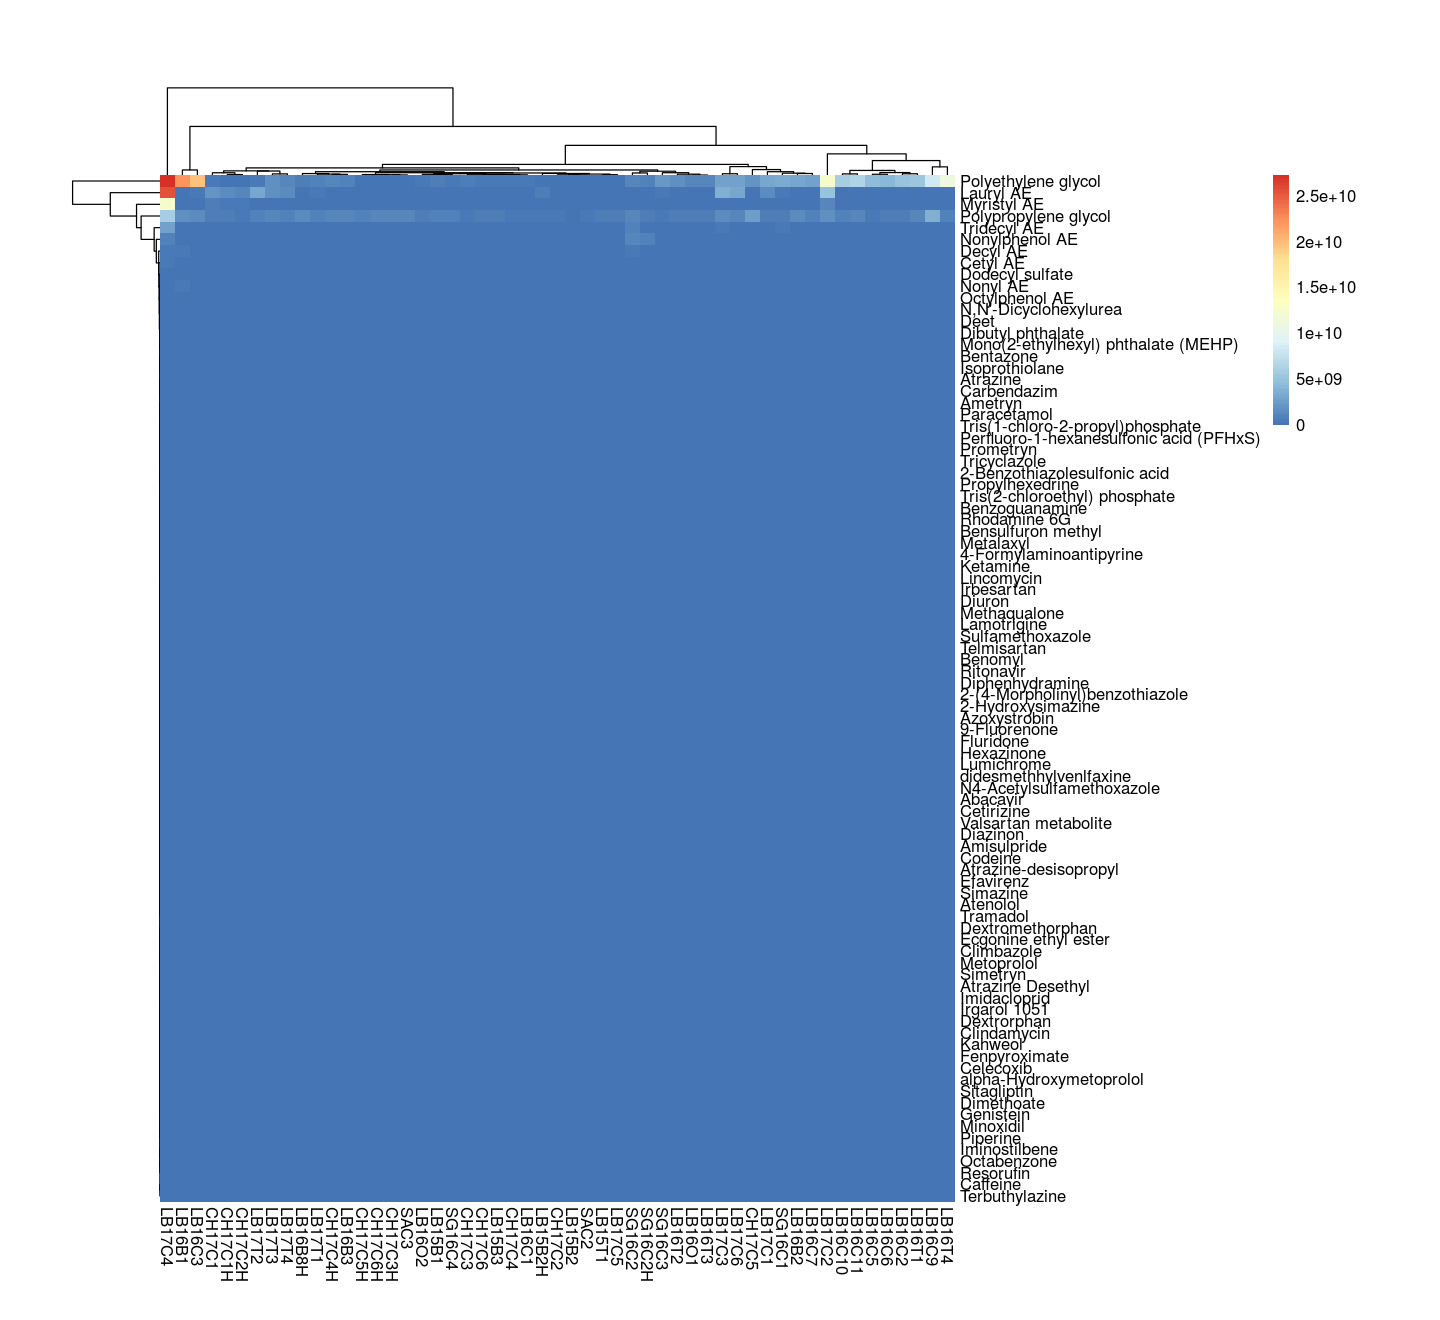

In [4]:
library(repr)
options(repr.plot.width=12, repr.plot.height=11)

pheatmap(mat=heatmap.values, border_color=NA, cellwidth=9, cellheight=7, labels_col=cpd.table$Ship)

The heatmap works, although most would agree this isn't terribly interesting or enlightening in it's current form. Currently nearly the whole map is the same color. Log scaling the observational data will better highlight the differences between samples and concentrations.

In [5]:
heatmap.values <- log(cpd.table[,4:length(cpd.table)])
head(heatmap.values)

2-(4-Morpholinyl)benzothiazole,2-Benzothiazolesulfonic acid,2-Hydroxysimazine,2-Phenylphenol,"3,4-Dichlorophenylurea","4,4'-Dihydroxydiphenylsulfone",4-Cumylphenol,4-Formylaminoantipyrine,4-Hydroxy chlorothalonil,4-Tertiary Octylphenol,⋯,Sulfamethoxazole,Telmisartan,Terbuthylazine,Theophylline,Tramadol,Tricyclazole,Tridecyl AE,Tris(1-chloro-2-propyl)phosphate,Tris(2-chloroethyl) phosphate,Valsartan metabolite
6.632232,9.440784,10.41169,11.600026,9.651734,11.949885,6.461519,9.414778,12.754638,9.604388,⋯,8.907707,9.881882,10.193666,8.158210,8.414177,10.782716,17.42096,12.67585,11.78392,10.297316
10.988015,10.287988,11.77094,5.212765,8.860496,11.246817,7.328591,11.314746,7.394059,8.334712,⋯,10.492443,10.912439,10.018323,7.244296,8.512842,13.990587,16.96183,12.80835,11.98142,11.087664
9.835790,9.869291,11.64014,5.332888,8.077009,10.225581,7.158723,11.226570,12.454309,7.924278,⋯,10.465131,11.043030,10.072350,6.873941,7.431383,13.953111,15.14332,12.74978,11.97162,11.112107
10.092082,10.061815,11.71874,5.258037,8.533057,9.877872,6.384532,11.228893,12.552677,7.701562,⋯,10.317108,9.259796,10.119324,7.058850,7.833801,13.936228,16.72588,12.75325,12.05263,10.972325
11.285225,10.154368,10.05804,4.958724,8.554015,10.931982,6.619783,7.787321,12.446158,7.749297,⋯,7.792390,7.336758,8.135438,12.019575,8.190140,9.607315,17.17265,12.71221,11.27664,8.480602
11.394929,10.994697,11.60877,5.999312,9.767107,11.495472,7.426121,11.688956,6.995497,8.886604,⋯,10.976419,12.375954,10.933721,11.767483,10.154561,14.571885,16.32954,14.51906,13.52555,10.170223


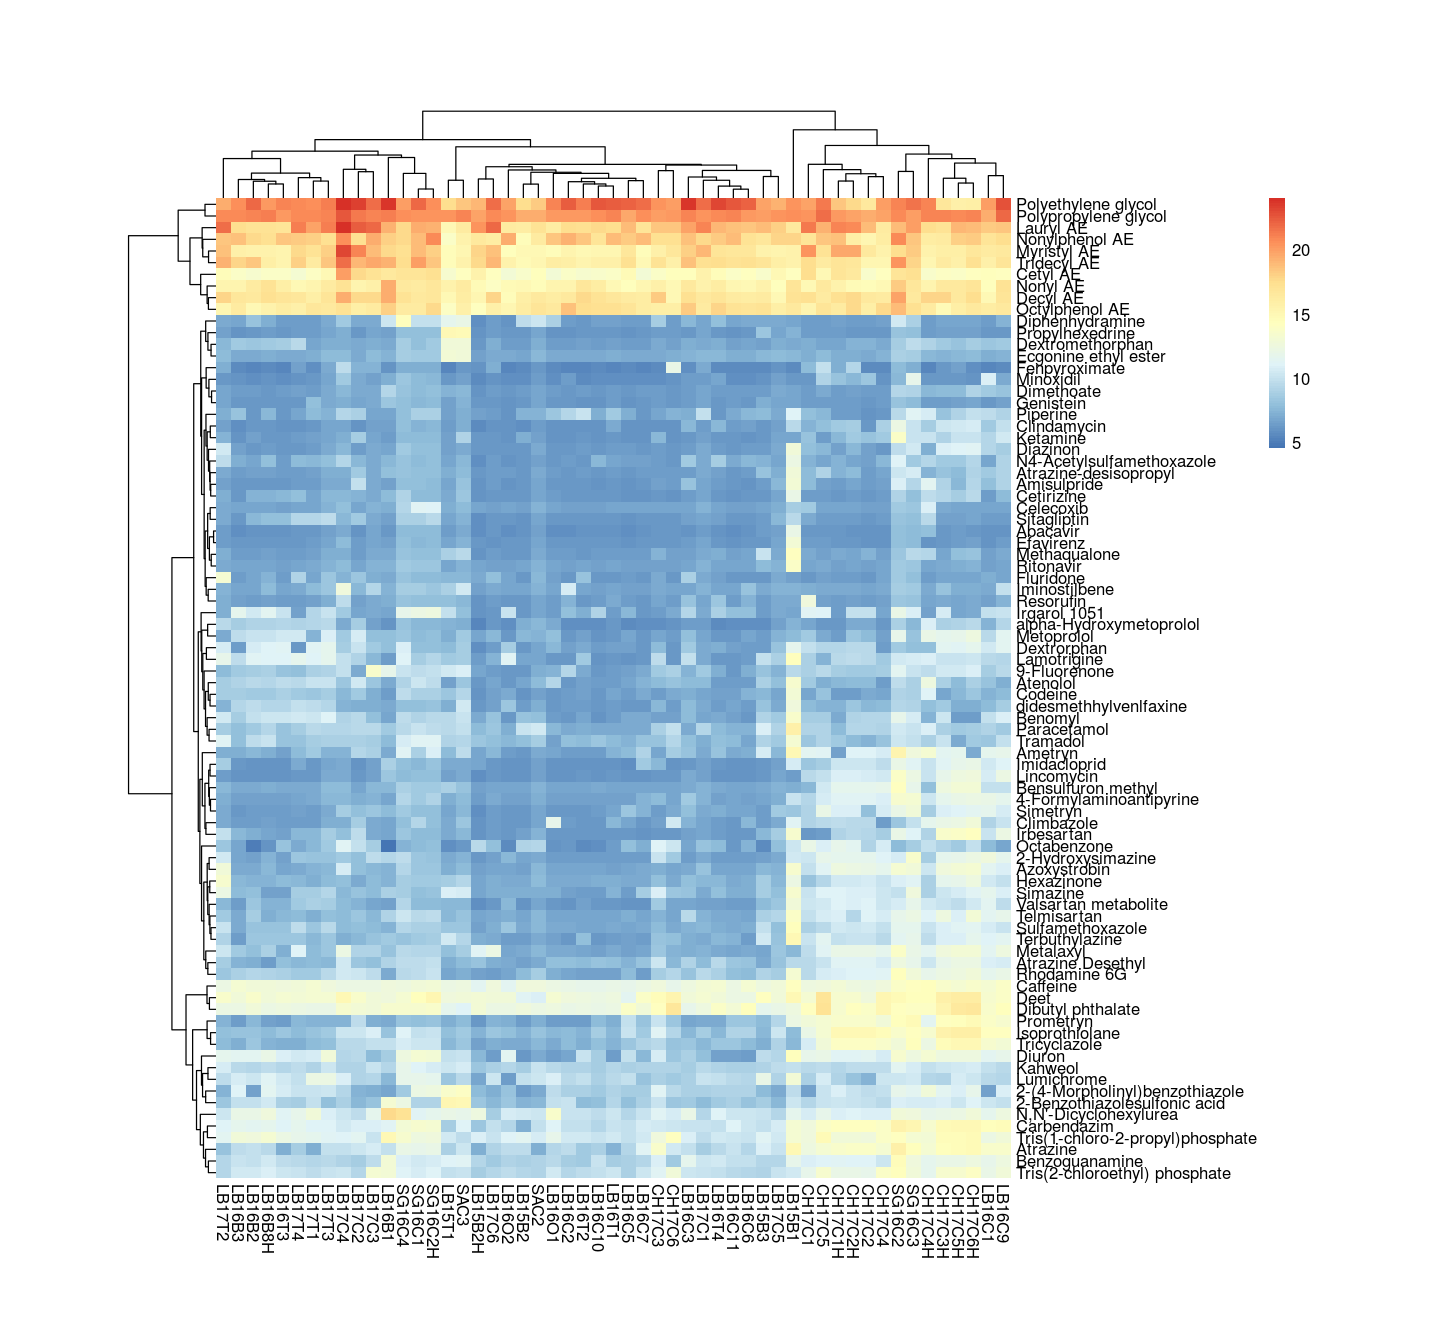

In [6]:
heatmap.values <- NaRV.omit(t(heatmap.values))
pheatmap(mat=heatmap.values, border_color=NA, cellwidth=9, cellheight=7, labels_col=cpd.table$Ship)

The heatmap looks much better now. Pheatmap also automatically does hierarchical clustering and plots a dendrogram on each axis. But we can add more: we can add labels for each terminal node using our categorical variables using pheatmap's built-in 'annotation-col' and 'annotation-row' parameters. To do this, just supply the vectors of labels matching any given axis. For the columns, we can just grab these from our wide-form table we dcasted earlier. 

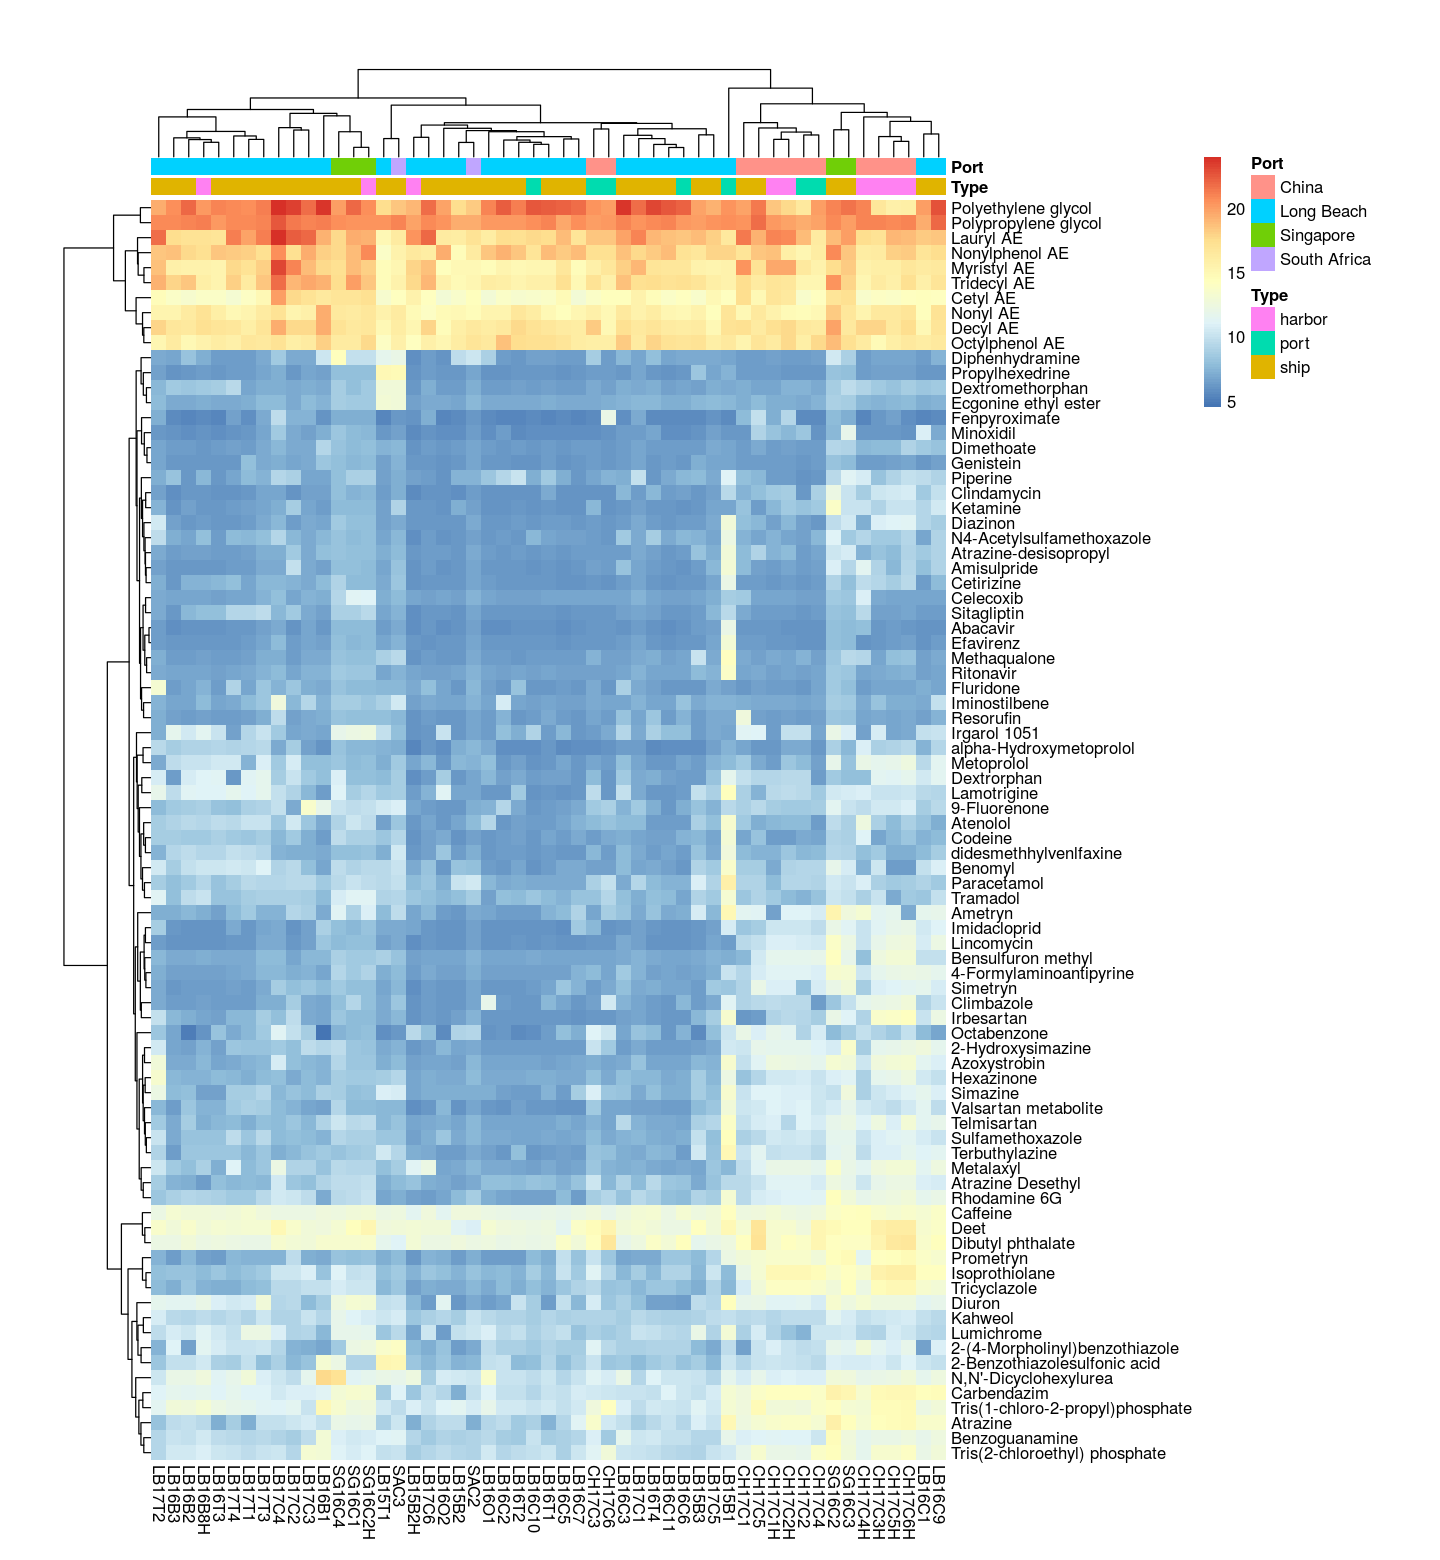

In [7]:
annotation_col <- as.data.frame(cpd.table[,2:3])
row.names(annotation_col) <- cpd.table[,1]
colnames(heatmap.values) <- cpd.table[,1]

options(repr.plot.width=12, repr.plot.height=13)
pheatmap(mat=NaRV.omit(heatmap.values),
         border_color=NA, cellwidth=9, cellheight=9, labels_col=cpd.table[,1],
         annotation_col = annotation_col)

The row is a bit trickier. Since we re-casted our data by 'compound' and not our sample labels, our 'compound type' vector is not in the corect shape. We'll need to cast our original data but this time re-shaping it around the 'Ship' variable. Then we can grab the 'compound type' label vector and throw it in our heatmap. 

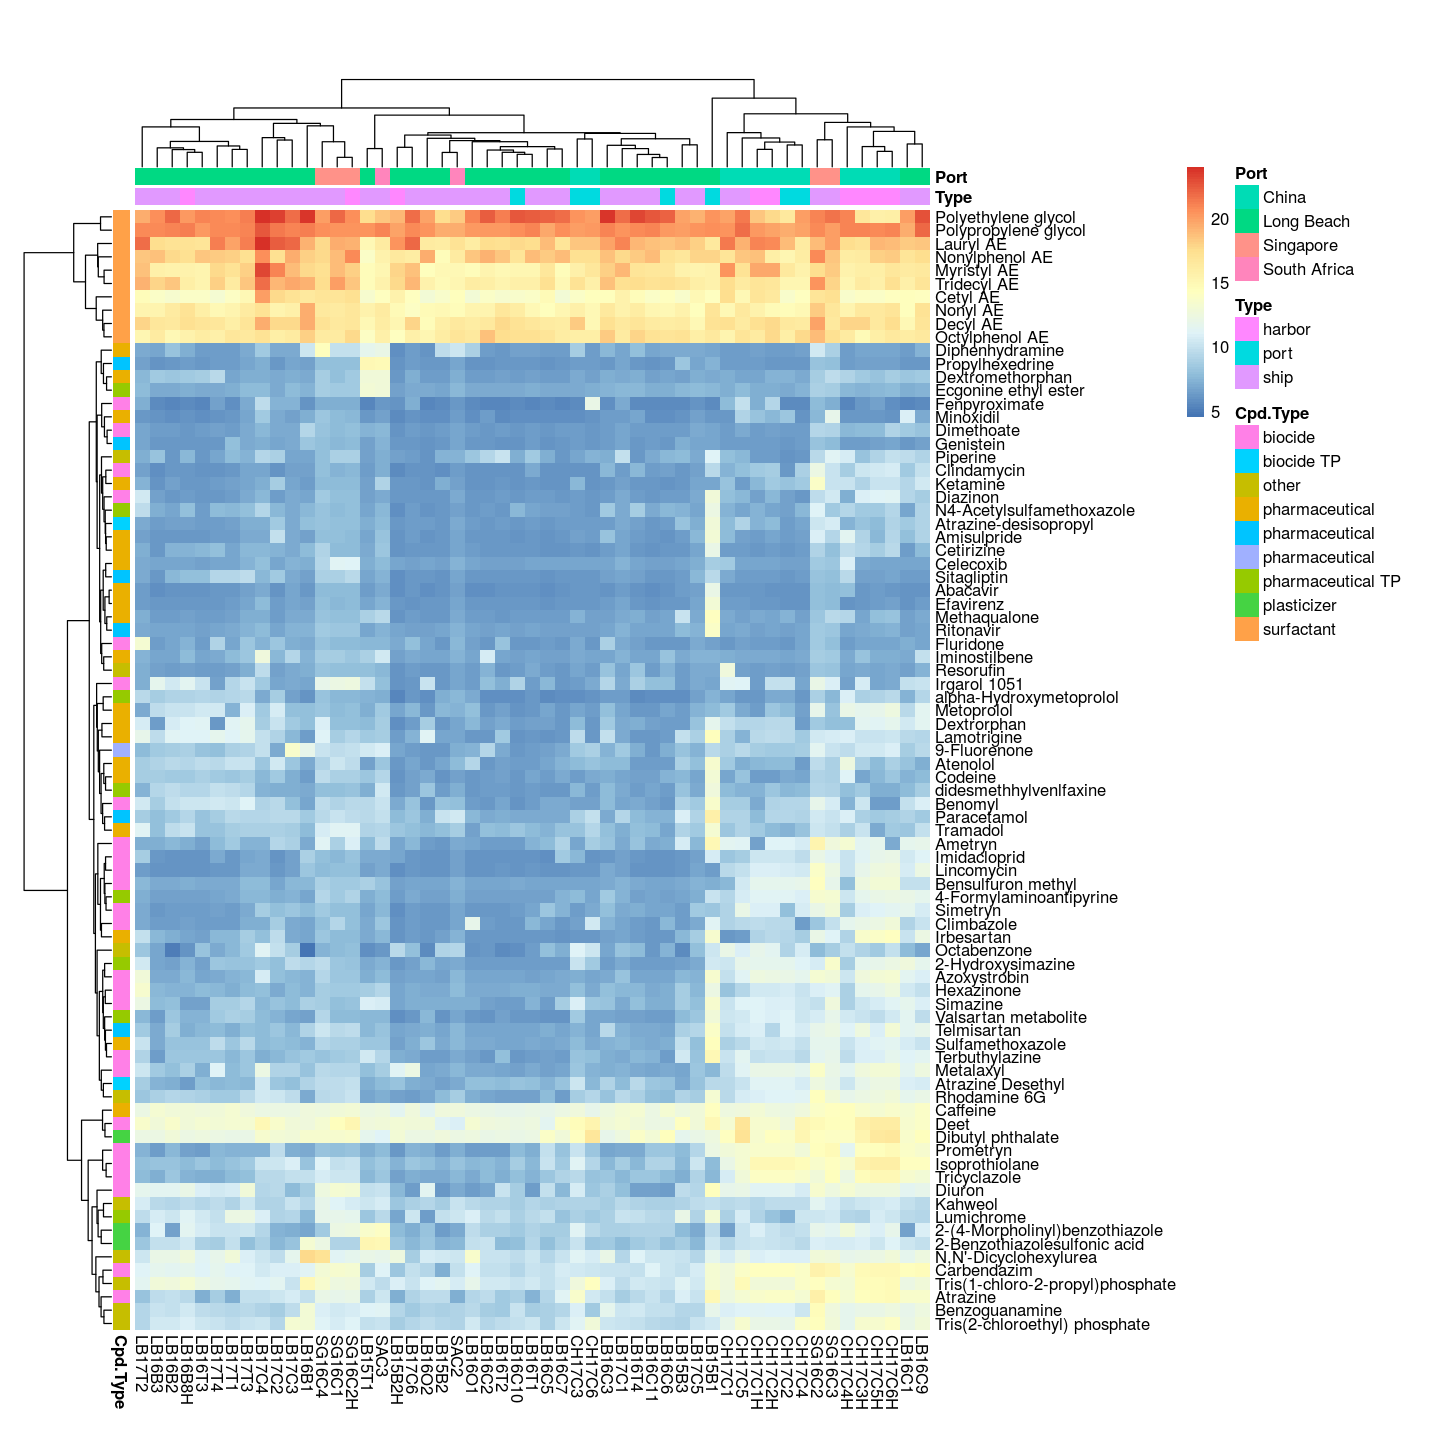

In [8]:
ship.table = dcast(data, Compound + Cpd.Type ~ Ship, value.var = c("Value"))

annotation_row <- as.data.frame(ship.table[,2])
row.names(annotation_row) <- ship.table[,1]
colnames(annotation_row) <- "Cpd.Type"

options(repr.plot.width=12, repr.plot.height=12)
pheatmap(mat=NaRV.omit(heatmap.values),
         border_color=NA, cellwidth=9, cellheight=8, labels_col=cpd.table[,1],
         annotation_col = annotation_col, annotation_row = annotation_row)

That's about it. You can change the color too to make the data more clear or aesthetic although color's not really my strong suit.

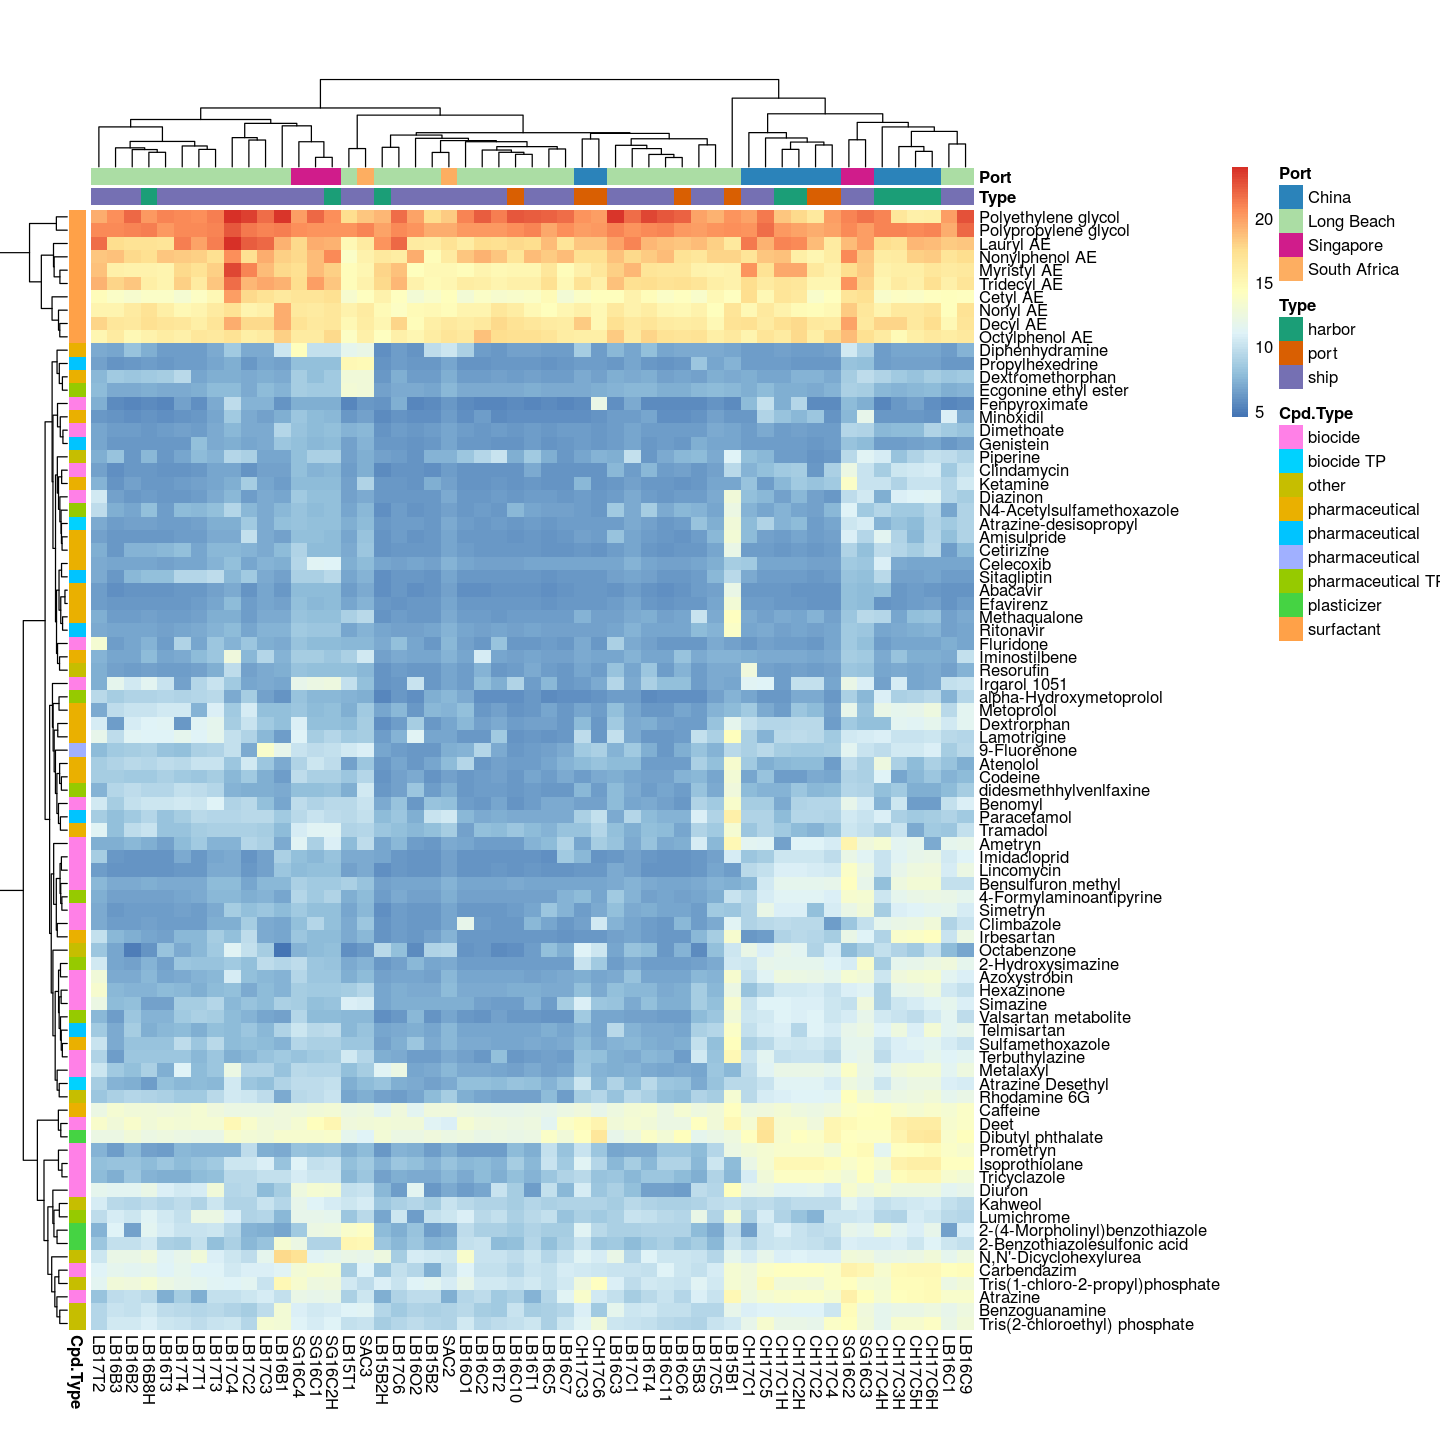

In [9]:
library(RColorBrewer)
ann_colors = list(
  Port = c("China" = "#2b83ba", "Long Beach" = "#abdda4", "Singapore" = "#d01c8b", "South Africa" = "#fdae61"),
  Type = c("harbor" = "#1b9e77", "port" = "#d95f02", "ship" = "#7570b3")
)

options(repr.plot.width=12, repr.plot.height=12)
pheatmap(mat=NaRV.omit(heatmap.values),
         border_color=NA, cellwidth=10, cellheight=8, labels_col=cpd.table[,1],
         annotation_col = annotation_col, annotation_row = annotation_row, annotation_colors = ann_colors)